In [1]:
!nvidia-smi

Sun May  8 23:13:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.15       Driver Version: 512.15       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P0    27W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import torch
import random

from tic_env import TictactoeEnv, OptimalPlayer
from DQN_utils import DQ_learner

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

env = TictactoeEnv()
learner = DQ_learner()

In [4]:
env.reset()
losses, rewards = learner.train(number_games=20000, opponent_epsilon=.5, env=env)

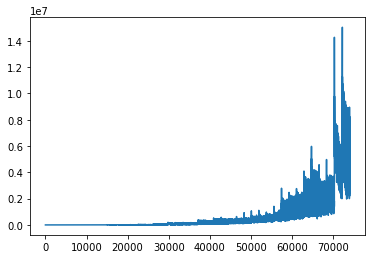

In [6]:
import matplotlib.pyplot as plt

losses_numpy = torch.stack([l for l in losses if l is not None]).cpu().detach().numpy()
x = np.linspace(0, losses_numpy.shape[0], losses_numpy.shape[0])
plt.plot(x, losses_numpy)

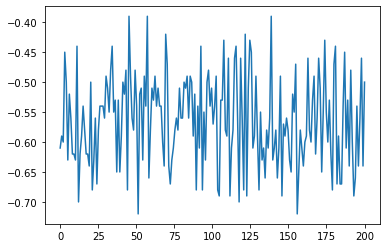

In [10]:
rewards_numpy = np.array(rewards)
avg_rewards = np.empty((int(rewards_numpy.shape[0]/100),))
for i in range(0, int(rewards_numpy.shape[0]/100)):
    avg_rewards[i] = 0.01*rewards_numpy[100*i:100*(i+1)-1].sum()
games = np.linspace(0, int(rewards_numpy.shape[0]/100), int(rewards_numpy.shape[0]/100))
plt.plot(games, avg_rewards)